In [2]:
#importing  the important libraries
import pandas as pd
import numpy as np
#reading the input data 
df=pd.read_csv(r'C:\Users\srini\Downloads/Housing.csv')
#check the data
df.head() 

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
#describe the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,545.0,4.766729e+06,1.870440e+06,1750000.0,3430000.0,4340000.0,5740000.0,13300000.0
area,545.0,5.150541e+03,2.170141e+03,1650.0,3600.0,4600.0,6360.0,16200.0
bedrooms,545.0,2.965138e+00,7.380639e-01,1.0,2.0,3.0,3.0,6.0
bathrooms,545.0,1.286239e+00,5.024696e-01,1.0,1.0,1.0,2.0,4.0
stories,545.0,1.805505e+00,8.674925e-01,1.0,1.0,2.0,2.0,4.0
parking,545.0,6.935780e-01,8.615858e-01,0.0,0.0,0.0,1.0,3.0


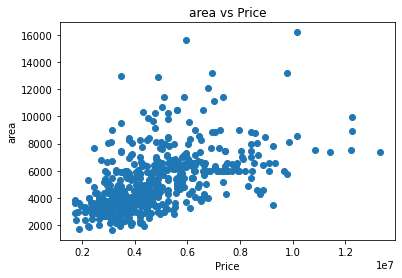

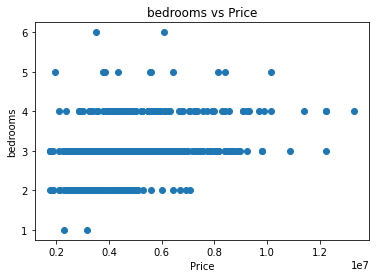

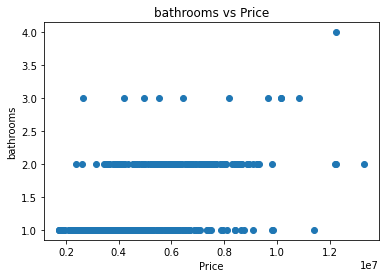

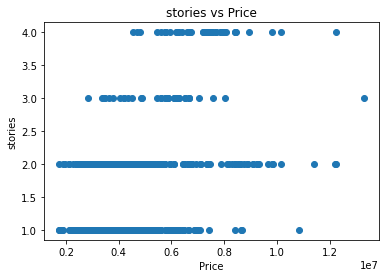

In [4]:
#visualise the data 
import matplotlib.pyplot as plt
%matplotlib inline
#using scatter plot
def scatter_plot(x):
    
    plt.scatter(df['price'], df[x])
    plt.title(x +' vs Price') #title of the graph
    plt.xlabel('Price') #x-axis
    plt.ylabel(x) #y-axis
    plt.show()


scatter_plot('area') 
scatter_plot('bedrooms') 
scatter_plot('bathrooms') 
scatter_plot('stories') 

In [5]:
#define the input [x] and the output / prediction data
#define the y first 
y=df['price']
# now the input data 
x=df.drop(['price','mainroad',
          'guestroom',
          'basement',
          'hotwaterheating',
          'airconditioning',
          'prefarea',
          'furnishingstatus'], axis=1)

In [6]:
x.shape , y.shape

((545, 5), (545,))

In [7]:
x.dtypes

area         int64
bedrooms     int64
bathrooms    int64
stories      int64
parking      int64
dtype: object

In [8]:
df.corr()

,price,area,bedrooms,bathrooms,stories,parking
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.384394
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.352980
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,0.139270
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.177496
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.045547
parking,0.384394,0.352980,0.139270,0.177496,0.045547,1.000000


In [9]:
#now lets trin the model by using linear Regression 
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [10]:
#now lets split the data into train and test 
from sklearn.model_selection import train_test_split
x_train , x_test , y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=2)

In [11]:
#lets check the shape of the data
x_train.shape , x_test.shape , y_train.shape , y_test.shape

((436, 5), (109, 5), (436,), (109,))

In [12]:
#lets scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

x_train[:5] , x_test[:5]

(array([[-1.17687206,  0.03201512, -0.58376171,  0.20075855, -0.78680611],
        [ 1.23991283, -1.36384432, -0.58376171, -0.93600416,  0.40020934],
        [-0.90755979, -1.36384432, -0.58376171, -0.93600416, -0.78680611],
        [ 0.7481252 ,  0.03201512, -0.58376171, -0.93600416, -0.78680611],
        [-0.57267583,  0.03201512, -0.58376171,  0.20075855, -0.78680611]]),
 array([[-0.98672347,  0.10141207, -0.52339781,  0.32899363, -0.8871656 ],
        [-0.65518355,  0.10141207, -0.52339781,  0.32899363,  1.28589171],
        [-0.58102331, -1.1268008 , -0.52339781, -0.90756863, -0.8871656 ],
        [-0.70753196, -1.1268008 , -0.52339781, -0.90756863,  0.19936306],
        [ 0.36561041,  0.10141207, -0.52339781,  1.56555589, -0.8871656 ]]))

In [13]:
#now train the model by using fit()
model.fit(x_train,y_train)

LinearRegression()

In [14]:
#now calculate the score of the model by using model.score()
#test score model.score(x_test, y_test)
#train score model.score(x_train, y_train)
model.score(x_test, y_test) , model.score(x_train, y_train)

(0.5733121079158998, 0.5573094026886813)

In [15]:
model.predict(x_test)

array([ 3560963.32807814,  4472202.44096529,  3199342.78535624,
        3427662.69696299,  5164163.73030776,  4686292.07359677,
        3620103.61196862,  3679701.94851529,  3600005.83036365,
        4510304.01204599,  4575243.54274903,  3172289.38631994,
        4497330.54766725,  4358121.49394967,  4905426.27179409,
        6299926.82033819,  6344847.90500137,  4270935.92839485,
        3053463.90881917,  4172639.35709626,  5125032.00432499,
        4249730.3609607 ,  5320418.47843488,  5759522.34772424,
        2853304.52008226,  2978915.06160801,  3236660.63749363,
        4553623.20926505,  6382981.68294046,  3382855.39742242,
        3814074.60035177,  2937186.91785438,  3520252.94392826,
        5754939.65753112,  4646213.45623033,  6927458.38558522,
        2941597.20947062,  6302327.46972264,  5025632.13190939,
        3713737.49551334,  7635967.56894031,  4035917.80982674,
        3046678.84479419,  5070809.9650469 ,  4091218.5887965 ,
        3754337.65279007,  3600005.83036

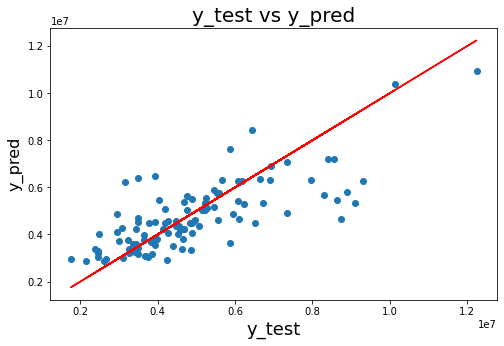

In [17]:

# Plotting y_test and y_pred to understand the spread

fig = plt.figure(figsize=(8,5))
y_pred= model.predict(x_test)
plt.scatter(y_test, y_pred)
plt.title('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      
plt.plot(y_test, y_test, color="r")